In [1]:
import sys
sys.path.append("../")

In [2]:
import glob
import torch
import matplotlib.pyplot as plt
import yaml
import argparse
from utils import yaml_parser
from model_wrapper.cnn_wrapper import CNNWrapper
import json
import torch
from model_wrapper import model_dict
import random
import numpy as np
from utils import vis_square
from scipy import stats
from ptflops import get_model_complexity_info



In [30]:
with open('../data/ncp/3ddet.json','r') as t:
    record = json.load(t)

In [32]:
np.load('../log/exp-benchmark-config_loss_macs_nb101_nas-111-20220907-161317')

[{'input_channel': [48, 32],
  'inverted_residual_setting': [[1, [4], [80]],
   [1, [4], [80]],
   [2, [1, 3], [96, 96]],
   [2, [1, 3], [96, 96]],
   [2, [1, 3], [96, 96]],
   [3, [4, 3, 1], [32, 16, 112]],
   [4, [3, 2, 2, 3], [64, 128, 16, 80]],
   [4, [3, 2, 2, 3], [64, 128, 16, 80]],
   [4, [3, 2, 2, 3], [64, 128, 16, 80]]],
  'last_channel': 96},
 75.38440015972203]

In [14]:
with open('../configs/config_nb201_mse_12e-1.yaml', 'r') as f:
    config = yaml_parser(yaml.unsafe_load(f))

In [8]:
maclist = (glob.glob('../log/exp-benchmark-config_macs*'))

In [9]:
maclist.sort()

In [12]:
for path in maclist:
    try:
        log_matrix = np.load(f'{path}/loss_matrix.npy',allow_pickle=True)
        
        print(path, float(min(log_matrix)))
    except:
        pass

../log/exp-benchmark-config_macs_amoeba-111-20220906-022726 -1853440000.0
../log/exp-benchmark-config_macs_amoebain-111-20220906-022102 -877355008.0
../log/exp-benchmark-config_macs_darts-111-20220906-021324 -515047424.0
../log/exp-benchmark-config_macs_dartsfixwd-111-20220906-021859 -178651136.0
../log/exp-benchmark-config_macs_dartsfixwdin-111-20220906-022149 -584392704.0
../log/exp-benchmark-config_macs_dartsin-111-20220906-020120 -912556032.0
../log/exp-benchmark-config_macs_dartsin-111-20220906-034547 -912556032.0
../log/exp-benchmark-config_macs_enas-111-20220906-022131 -600064000.0
../log/exp-benchmark-config_macs_enasfixwd-111-20220906-023609 -233881600.0
../log/exp-benchmark-config_macs_enasin-111-20220906-022423 -842526720.0
../log/exp-benchmark-config_macs_nasnet-111-20220906-032925 -1458520064.0
../log/exp-benchmark-config_macs_nasnetin-111-20220906-021858 -908869632.0
../log/exp-benchmark-config_macs_nb101-111-20220906-021223 -7218069504.0
../log/exp-benchmark-config_macs_

In [27]:
log_matrix = np.load('../log/exp-benchmark-config_macs_nb101-111-20220906-021223/loss_matrix.npy',allow_pickle=True)
train_archs_accs, eval_archs_accs = np.load('../log/exp-benchmark-config_macs_nb101-111-20220906-021223/benchmark.npy',allow_pickle=True)

In [28]:
accs = []
ranks = []
for arch,acc in eval_archs_accs:
    accs.append(acc)

In [31]:
min(log_matrix[:,0])

-7218069504.0

In [15]:
import glob

In [19]:
configs = glob.glob('../configs/config_macs_*')

In [21]:
configs[0]

'../configs/config_macs_nb201.yaml'

In [26]:
for i, config in enumerate(configs):
    string_config = config.replace('../configs/','').replace('.yaml','')
    print(f'python do_train.py --config={string_config} --gpu={i//10}')

python do_train.py --config=config_macs_nb201 --gpu=0
python do_train.py --config=config_macs_darts --gpu=0
python do_train.py --config=config_macs_dartsfixwd --gpu=0
python do_train.py --config=config_macs_amoeba --gpu=0
python do_train.py --config=config_macs_enasfixwd --gpu=0
python do_train.py --config=config_macs_pnasfixwd --gpu=0
python do_train.py --config=config_macs_nasnet --gpu=0
python do_train.py --config=config_macs_pnas --gpu=0
python do_train.py --config=config_macs_dartsin --gpu=0
python do_train.py --config=config_macs_resnet --gpu=0
python do_train.py --config=config_macs_resnexta --gpu=1
python do_train.py --config=config_macs_resnextb --gpu=1
python do_train.py --config=config_macs_nb101 --gpu=1
python do_train.py --config=config_macs_amoebain --gpu=1
python do_train.py --config=config_macs_enas --gpu=1
python do_train.py --config=config_macs_transmicrosegmentsemantic --gpu=1
python do_train.py --config=config_macs_transmicroautoencoder --gpu=1
python do_train.py --

In [27]:
import torch
# from thop import profile
from model_wrapper.backbones.model_ncp.supernet import MultiResolutionNet

# Get model using input_channel & network_setting & last_channel
model = MultiResolutionNet(input_channel=[16, 64],
                           network_setting=[[1, [3], [128]],
                            [2, [3, 3], [32, 48]],
                            [2, [3, 3], [32, 48]],
                            [2, [3, 3], [32, 48]],
                            [3, [2, 3, 2], [16, 32, 16]],
                            [3, [2, 3, 2], [16, 32, 16]],
                            [4, [2, 4, 1, 1], [64, 112, 48, 80]]],
                          last_channel=112)


In [28]:
x = model.downsamples(torch.randn(1,3,32,32))
# x = model.features([x])
x = [x]

In [29]:
for feature in model.features:
    x = feature(x)
    total = 0
    if type(x) == list:
        for sub in x:
            total += sub.size(1)
        print(total)

128
128
80
80
80
80
80
80
64
64
64
64
304
304


In [5]:
x[0].shape, x[1].shape, x[2].shape, x[3].shape

(torch.Size([1, 64, 32, 32]),
 torch.Size([1, 112, 16, 16]),
 torch.Size([1, 48, 8, 8]),
 torch.Size([1, 80, 4, 4]))

In [6]:
with open('../../b_clean_folder/exp/sample_task_barrier_ResNeXt-B_none_CONF_BN_SAMPLE_RES_1000_none_none_16_64_cifar10_10_111/record.json','r') as t:
    results = json.load(t)

In [51]:
accs = []
preds = []
for arch, pred in results:
    accs.append(nds.get_final_accuracy(int(arch), None, None))
    preds.append(pred[0])


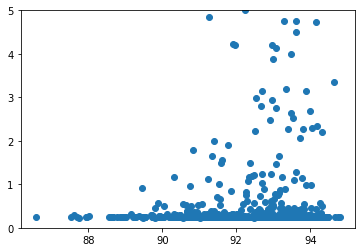

In [52]:
plt.ylim(0,5)
plt.scatter(accs, preds)

In [12]:
log_matrix = np.load('../log/exp-benchmark-config_nb201_mse_12e-1-111-20220905-152238/loss_matrix.npy',allow_pickle=True)
train_archs_accs, eval_archs_accs = np.load('../log/exp-benchmark-config_nb201_mse_12e-1-111-20220905-152238/benchmark.npy',allow_pickle=True)

In [13]:
accs = []
ranks = []
for arch,acc in eval_archs_accs:
    accs.append(acc)
for i in range(10):
    ranks.append(stats.spearmanr(accs, log_matrix[:,i]))

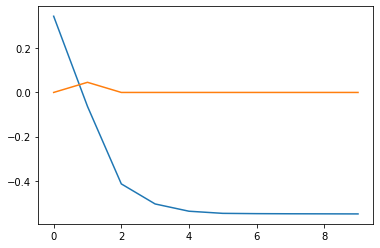

In [14]:
plt.plot(ranks)

(80.0, 100.0)

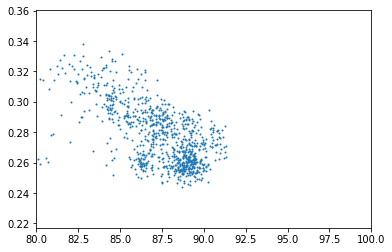

In [15]:
plt.scatter(accs, log_matrix[:,-1], s = 1)
plt.xlim(80,100)

In [3]:
rank = stats.spearmanr([0,0,0], [0,0,0])


/usr/scratch/yli3521/miniconda3/envs/debug/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [11]:
dot = torch.randint(-1, 1, [16, 512, 8, 8]).float() * 2 + 1
torch.save(dot, '../data/features/dot.pth')

In [3]:
net_features = torch.load('../data/features/net.pth')

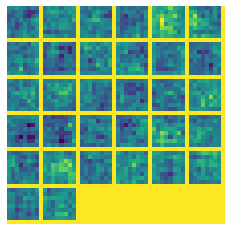

In [6]:
vis_square(net_features[0,:32])

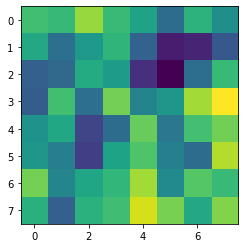

In [5]:
plt.imshow(net_features[0,-1].reshape(32))

In [25]:
from model_wrapper.backbones.model_nds.pycls.models.nas.fbnas import NDS

In [95]:
nds = NDS('DARTS_fix-w-d','../data/download_data/nds_data/')

In [98]:
# nds.get_network(0)

In [96]:
nds.get_network_config(0)

{'aux': False,
 'depth': 20,
 'drop_prob': 0.0,
 'genotype': {'normal': [['avg_pool_3x3', 1],
   ['dil_conv_3x3', 1],
   ['dil_conv_5x5', 0],
   ['dil_conv_3x3', 0],
   ['dil_conv_5x5', 2],
   ['dil_conv_3x3', 2],
   ['none', 4],
   ['skip_connect', 1]],
  'normal_concat': [2, 3, 4, 5],
  'reduce': [['none', 0],
   ['max_pool_3x3', 1],
   ['dil_conv_5x5', 2],
   ['dil_conv_3x3', 2],
   ['max_pool_3x3', 3],
   ['max_pool_3x3', 1],
   ['skip_connect', 4],
   ['skip_connect', 1]],
  'reduce_concat': [2, 3, 4, 5]},
 'width': 16}

In [85]:
nds.get_network_config(20)

{'block_type': 'res_bottleneck_block',
 'bot_muls': [1.0, 0.25, 0.25, 0.25],
 'ds': [1, 2, 2, 4],
 'num_gs': [1, 2, 16, 8],
 'ss': [1, 1, 2, 2],
 'ws': [16, 64, 512, 64]}

In [14]:
'sin' in ['sin']

True

In [17]:
a = list(np.arange(len(config.backbone_config.NDS )))

In [18]:
random.shuffle(a)

In [4]:
with open('../configs/nds_resnet_siam_mse_benchmark_12e-1.yaml', 'r') as f:
    config = yaml_parser(yaml.unsafe_load(f))

In [5]:
config.backbone_config.search_space = 'ResNeXt-A'
config.backbone_config.NDS = NDS(config.backbone_config.search_space,'../data/download_data/nds_data/')
config.backbone_config.arch = random.choice(list(np.arange(len(config.backbone_config.NDS ))))
model = CNNWrapper(config.backbone_config, config.head_config)#model_dict.BACKBONE_CONFIGS[config.backbone_config.model](config.backbone_config)
model(torch.rand(3,3,32,32)).size()

torch.Size([3, 512, 8, 8])

In [6]:
model

CNNWrapper(
  (backbone): BackboneNDS(
    (model): AnyNet(
      (stem): ResStemCifar(
        (conv): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      (s1): AnyStage(
        (b1): ResBottleneckBlock(
          (proj): Conv2d(12, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (f): BottleneckTransform(
            (a): Conv2d(12, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (a_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (a_relu): ReLU(inplace=True)
            (b): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (b_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_

In [20]:
for search_space in ['DARTS','DARTS_in','DARTS_fix-w-d','DARTS_fix-w-d_in',\
                                     'ENAS','ENAS_in','ENAS_fix-w-d',\
                                     'PNAS','PNAS_in','PNAS_fix-w-d',\
                                     'Amoeba','Amoeba_in',\
                                     'NASNet','NASNet_in', \
                                        'ResNet','ResNeXt-A','ResNeXt-A_in','ResNeXt-B','ResNeXt-B_in']:
    config.backbone_config.search_space = search_space
    config.backbone_config.NDS = NDS(config.backbone_config.search_space,'../data/download_data/nds_data/')
    config.backbone_config.arch = random.choice(list(np.arange(len(config.backbone_config.NDS ))))
    model = CNNWrapper(config.backbone_config, config.head_config)#model_dict.BACKBONE_CONFIGS[config.backbone_config.model](config.backbone_config)
    assert model(torch.rand(3,3,32,32)).size(-1) == 8

KeyboardInterrupt: 

In [21]:
model(torch.rand(3,3,32,32)).size()

torch.Size([3, 512, 8, 8])

In [18]:
model = model_dict.BACKBONE_CONFIGS[config.backbone_config.model](config.backbone_config)

In [19]:
model(torch.rand(3,3,32,32)).shape

torch.Size([3, 32, 8, 8])

In [11]:
import math
def positionalencoding2d(d_model, height, width):
    """
    :param d_model: dimension of the model
    :param height: height of the positions
    :param width: width of the positions
    :return: d_model*height*width position matrix
    """
    if d_model % 4 != 0:
        raise ValueError("Cannot use sin/cos positional encoding with "
                         "odd dimension (got dim={:d})".format(d_model))
    pe = torch.zeros(d_model, height, width)
    # Each dimension use half of d_model
    d_model = int(d_model / 2)
    div_term = torch.exp(torch.arange(0., d_model, 2) *
                         -(math.log(10000.0) / d_model))
    pos_w = torch.arange(0., width).unsqueeze(1)
    pos_h = torch.arange(0., height).unsqueeze(1)
    pe[0:d_model:2, :, :] = torch.sin(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[1:d_model:2, :, :] = torch.cos(pos_w * div_term).transpose(0, 1).unsqueeze(1).repeat(1, height, 1)
    pe[d_model::2, :, :] = torch.sin(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    pe[d_model + 1::2, :, :] = torch.cos(pos_h * div_term).transpose(0, 1).unsqueeze(2).repeat(1, 1, width)
    return pe


In [15]:
feature = positionalencoding2d(256,8,8)

In [41]:
a = torch.load('../data/dataset/output.pth', map_location='cpu')

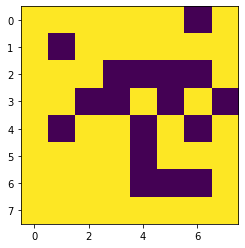

In [44]:
plt.imshow(a[-1,-2])

In [43]:
f'{0.002}'

'0.002'

In [3]:
glob.glob('../model_wrapper/**/*.py', recursive=True)

['../model_wrapper/cnn_wrapper.py',
 '../model_wrapper/model_dict.py',
 '../model_wrapper/heads/head_nb101.py',
 '../model_wrapper/backbones/backbone_nb101.py',
 '../model_wrapper/backbones/model_nb101/model_nb101.py',
 '../model_wrapper/backbones/model_nb101/base_ops.py',
 '../model_wrapper/backbones/model_nb101/graph_util.py',
 '../model_wrapper/backbones/model_nb101/model_spec.py',
 '../model_wrapper/generators/simple_generator.py']

In [5]:
with open('../data/nb101/nasbench1_2500.json','r') as t:
    archs_accs = json.load(t)

In [6]:
arch, acc = archs_accs[0]

In [7]:
with open('../configs/nb101_simple.yaml', 'r') as f:
    config = yaml_parser(yaml.unsafe_load(f))



In [14]:
(config.optim_g_config.weight_decay)

4e-05

In [9]:
config.backbone_config.arch = arch

In [10]:
backbone_config = config.backbone_config
head_config = config.head_config
model = CNNWrapper(backbone_config, head_config)

In [21]:
torch.max(torch.rand(10,2),1)

torch.return_types.max(
values=tensor([0.4871, 0.3014, 0.3138, 0.3526, 0.7189, 0.2491, 0.8333, 0.3806, 0.7044,
        0.8462]),
indices=tensor([0, 1, 0, 0, 0, 1, 0, 0, 1, 1]))

In [10]:
a = torch.rand(32,3,32,32)

In [11]:
model(a).shape

torch.Size([32, 2, 64, 8, 8])

In [10]:
config.head_config.out_channel

128